# <span style="color:orange"> Laboratorio di Simulazione Numerica </span>
## <span style="color:orange"> Esercitazione 6 </span>

### Paolo Panatti (12606A)

### <font color="blue"> Esercizio 06.1

#### Obiettivo:
Simulare un modello di Ising 1D utilizzando sia l'algoritmo di Metropolis che quello di Gibbs per il campionamento del peso di Boltzmann.

#### Modello di Ising 1D
Il modello di Ising è un modello fisico-matematico studiato in meccanica statistica, che è stato inizialmente ideato per descrivere il magnetismo nella materia. Si tratta di un sistema di $N$ variabili discrete $s_i$ (spin), con valori possibili pari a $\pm 1$, disposte in corrispondenza dei siti di un reticolo periodico con geometria ben definita, che interagiscono tra loro (l'interazione è limitata ai primi vicini) e con un campo magnetico esterno. Assumendo un sistema di unità in cui $\mu_B = 1$ e $k_B = 1$, nel caso monodimensionale l'Hamiltoniana è data da:
$$H = -J \sum_{i=1}^N s_i s_{i+1} -\frac{h}{2} \sum_{i=1}^N (s_i + s_{i+1})$$
con $J>0$ (modello ferromagnetico) e $s_{N+1} = s_1$ (condizioni periodiche al contorno).

Questo modello è risolubile analiticamente, dal momento che la funzione di partizione $Z$ può essere calcolata in modo esatto:
$$Z = \sum_{\{ s_i \}} \exp \left( -\beta H \right) = \lambda_1^N + \lambda_2^N$$
dove $\lambda_{1,2} = e^{\beta J} \cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$ e $\beta = \frac{1}{k_b T} = \frac{1}{T}$.

Conoscendo la funzione di partizione $Z$, da questa è possibile ricavare l'energia libera di Helmholtz $A = -k_B T \ln Z$ e di conseguenza anche tutte le altre quantità termodinamiche di interesse, come ad esempio:
- Energia interna $U$
- Capacità termica $C$
- Magnetizzazione $M$
- Suscettività magnetica $\chi$

Se vogliamo simulare numericamente un modello di questo tipo abbiamo bisogno innanzitutto di un algoritmo che ci permetta di campionare il peso di Boltzmann $p(\{ s_i \}) = \exp(-\beta H)/Z$. In questo esercizio ne utilizziamo due:

#### Algoritmo di Metropolis
Partendo da una configurazione $\mu$ si genera una nuova configurazione $\nu$ proponendo il flip di un solo spin scelto casualmente. Questa mossa viene accettata con probabilità $A(\nu|\mu)=\min\left[1,\frac{p(\nu)}{p(\mu)}\right]=\min\left[1,e^{-\beta(E_{\nu}-E_{\mu})}\right]$, dove $E_{\nu}-E_{\mu}$ è la differenza di energia tra i due stati.

#### Algoritmo di Gibbs
Questo algoritmo è applicabile quando si è in grado di campionare la distribuzione di probabilità condizionata e può essere visto come un caso particolare dell'algoritmo di Metropolis in cui la mossa proposta viene sempre accettata. Consiste nel selezionare casualmente uno spin alla volta e nell'assegnargli un nuovo valore, indipendentemente da quello attuale, secondo la distribuzione di probabilità condizionata determinata dalla configurazione degli altri spin, che rimangono invariati.
$$p(s_k'=\pm 1|\{s_j:j\ne k\}) = \frac{1}{1+\exp\left(\mp 2\beta J \sum_{i(\text{n.n. to k})} s_i\right)}$$

L'esercizio chiedeva in particolare di calcolare le seguenti grandezze:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0} - \langle H \rangle_{h=0}^2)$
3. $\chi(N,T) = \beta \langle (\sum_{i=1}^N s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1}^N s_i \rangle_{h=0.02}$

al variare della temperatura $T$ nel range $\left[0.5,2.0\right]$ per un sistema di $N=50$ spin con $J=1$.

Per fare ciò, dopo aver implementato l'algoritmo di Gibbs e il calcolo delle varie quantità termodinamiche all'interno del codice NSL_SIMULATOR, ho eseguito undici simulazioni in assenza di campo magnetico esterno e altrettante con un campo $h=0.02$, utilizzando ogni volta un valore di temperatura diverso nel range indicato. 

In linea di principio, il campionamento statistico della distribuzione di probabilità ottenuto con gli algoritmi discussi sopra è corretto solo asintoticamente, anche se nella pratica la convergenza è spesso piuttosto rapida. Dunque, se si parte da una configurazione di spin randomica, tipica di uno stato a temperatura infinita, per garantire che il campionamento corrisponda a quello asintotico, è necessario aspettare un certo numero di passi prima di iniziare ad effettuare le misure, affinché il sistema possa raggiungere l'equilibrio alla temperatura di interesse. La strategia che ho adottato è la seguente: ho cominciato dalla temperatura più alta, eseguendo una prima simulazione con configurazione iniziale casuale per equilibrare il sistema e poi ripartendo per misurare le proprietà. Dopodiché, ho eseguito tutte le altre simulazioni, riducendo di volta in volta la temperatura e usando come configurazione iniziale l'ultima configurazione della misura precedente, in modo da non dover ripetere l'equilibrazione.

In tutte le simulazioni, per la stima delle incertezze, ho utilizzato $20$ blocchi da $20000$ passi ciascuno, dove un passo Monte Carlo consiste nel provare a flippare una volta tutti gli spin del sistema (la scelta è casuale).

Riporto nei seguenti grafici i risultati ottenuti, confrontati con l'andamento teorico.

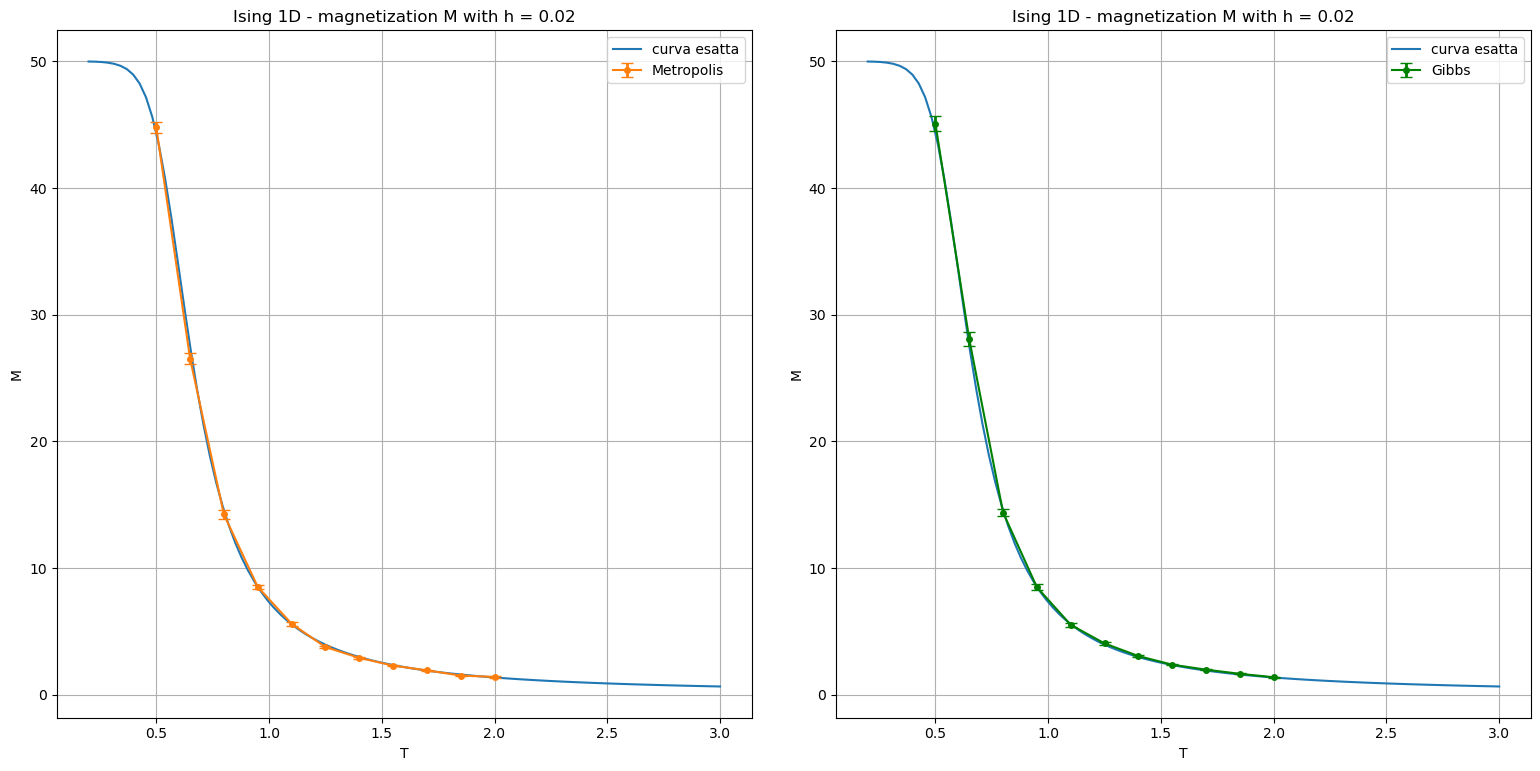

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = Ns*(np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

temp, mag_M, err_M, mag_G, err_G = np.loadtxt("magnetization.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')

fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.tight_layout(pad=3.0)

axes[0].plot(T,M,label='curva esatta')
axes[0].errorbar(temp,mag_M,yerr=err_M,fmt='-o',markersize=4,elinewidth=2,capsize=4,label='Metropolis')
axes[0].set_xlabel('T')
axes[0].set_ylabel('M')
axes[0].set_title('Ising 1D - magnetization M with h = 0.02')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(T,M,label='curva esatta')
axes[1].errorbar(temp,mag_G,yerr=err_G,fmt='-go',markersize=4,elinewidth=2,capsize=4,label='Gibbs')
axes[1].set_xlabel('T')
axes[1].set_ylabel('M')
axes[1].set_title('Ising 1D - magnetization M with h = 0.02')
axes[1].legend()
axes[1].grid(True)

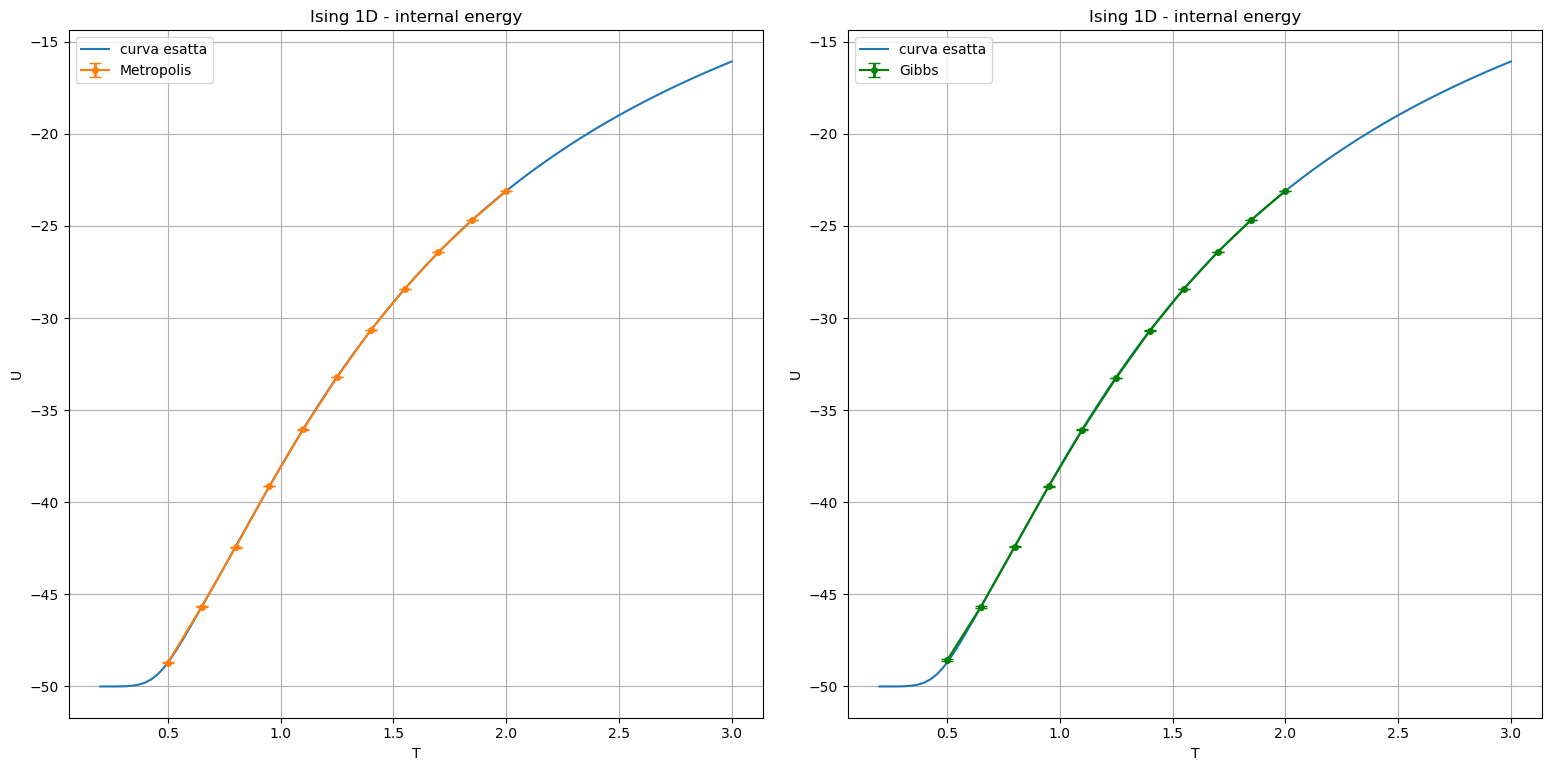

In [11]:
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

etot_M, err_M, etot_G, err_G = np.loadtxt("total_energy.dat", usecols=(1,2,3,4), delimiter=' ', unpack='true')

fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.tight_layout(pad=3.0)

axes[0].plot(T,Ns*e,label='curva esatta')
axes[0].errorbar(temp,Ns*etot_M,yerr=Ns*err_M,fmt='-o',markersize=4,elinewidth=2,capsize=4,label='Metropolis')
axes[0].set_xlabel('T')
axes[0].set_ylabel('U')
axes[0].set_title('Ising 1D - internal energy')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(T,Ns*e,label='curva esatta')
axes[1].errorbar(temp,Ns*etot_G,yerr=Ns*err_G,fmt='-go',markersize=4,elinewidth=2,capsize=4,label='Gibbs')
axes[1].set_xlabel('T')
axes[1].set_ylabel('U')
axes[1].set_title('Ising 1D - internal energy')
axes[1].legend()
axes[1].grid(True)

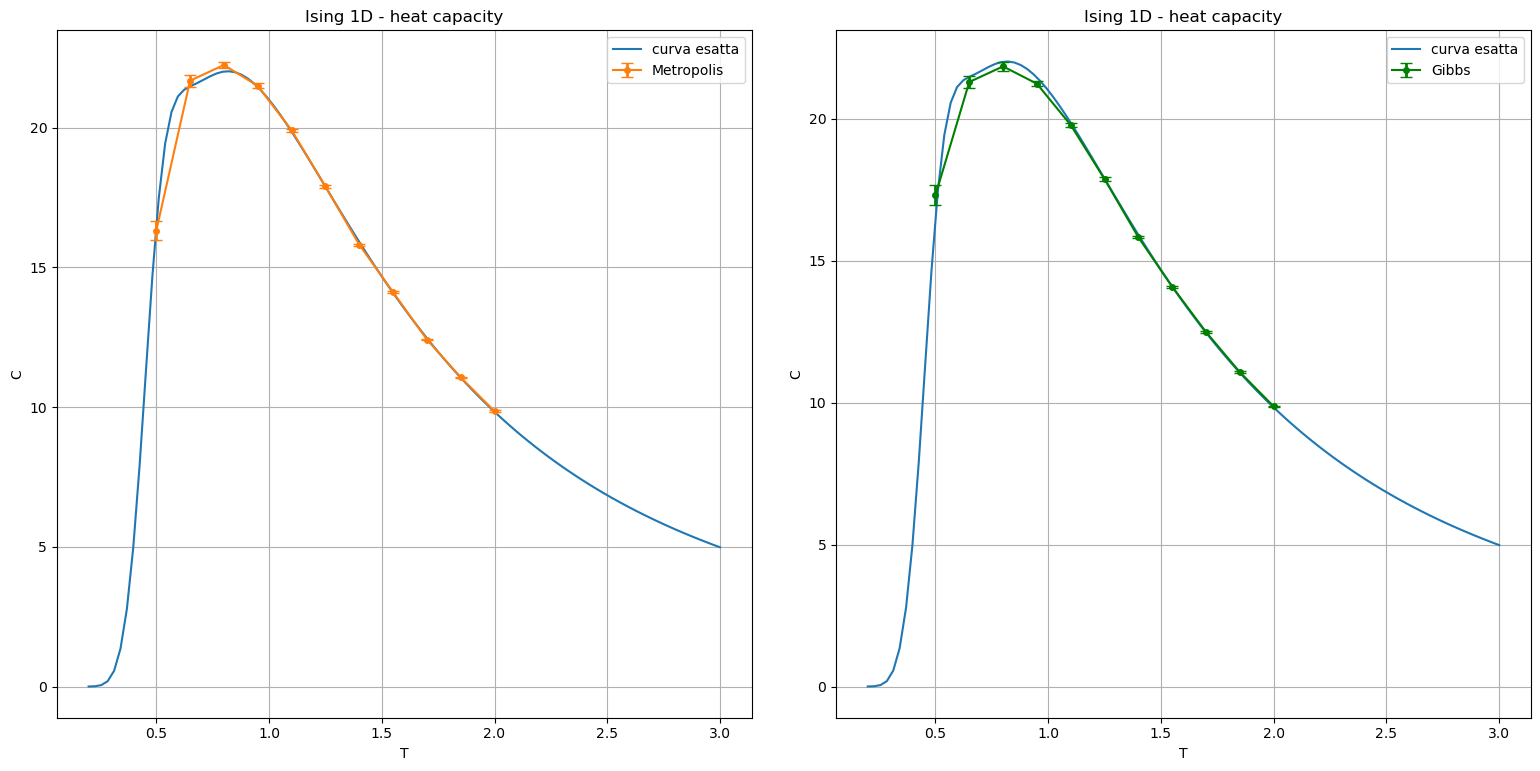

In [13]:
heat=Ns*((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

cv_M, err_M, cv_G, err_G = np.loadtxt("specific_heat.dat", usecols=(1,2,3,4), delimiter=' ', unpack='true')

fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.tight_layout(pad=3.0)

axes[0].plot(T,heat,label='curva esatta')
axes[0].errorbar(temp,cv_M,yerr=err_M,fmt='-o',markersize=4,elinewidth=2,capsize=4,label='Metropolis')
axes[0].set_xlabel('T')
axes[0].set_ylabel('C')
axes[0].set_title('Ising 1D - heat capacity')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(T,heat,label='curva esatta')
axes[1].errorbar(temp,cv_G,yerr=err_G,fmt='-go',markersize=4,elinewidth=2,capsize=4,label='Gibbs')
axes[1].set_xlabel('T')
axes[1].set_ylabel('C')
axes[1].set_title('Ising 1D - heat capacity')
axes[1].legend()
axes[1].grid(True)

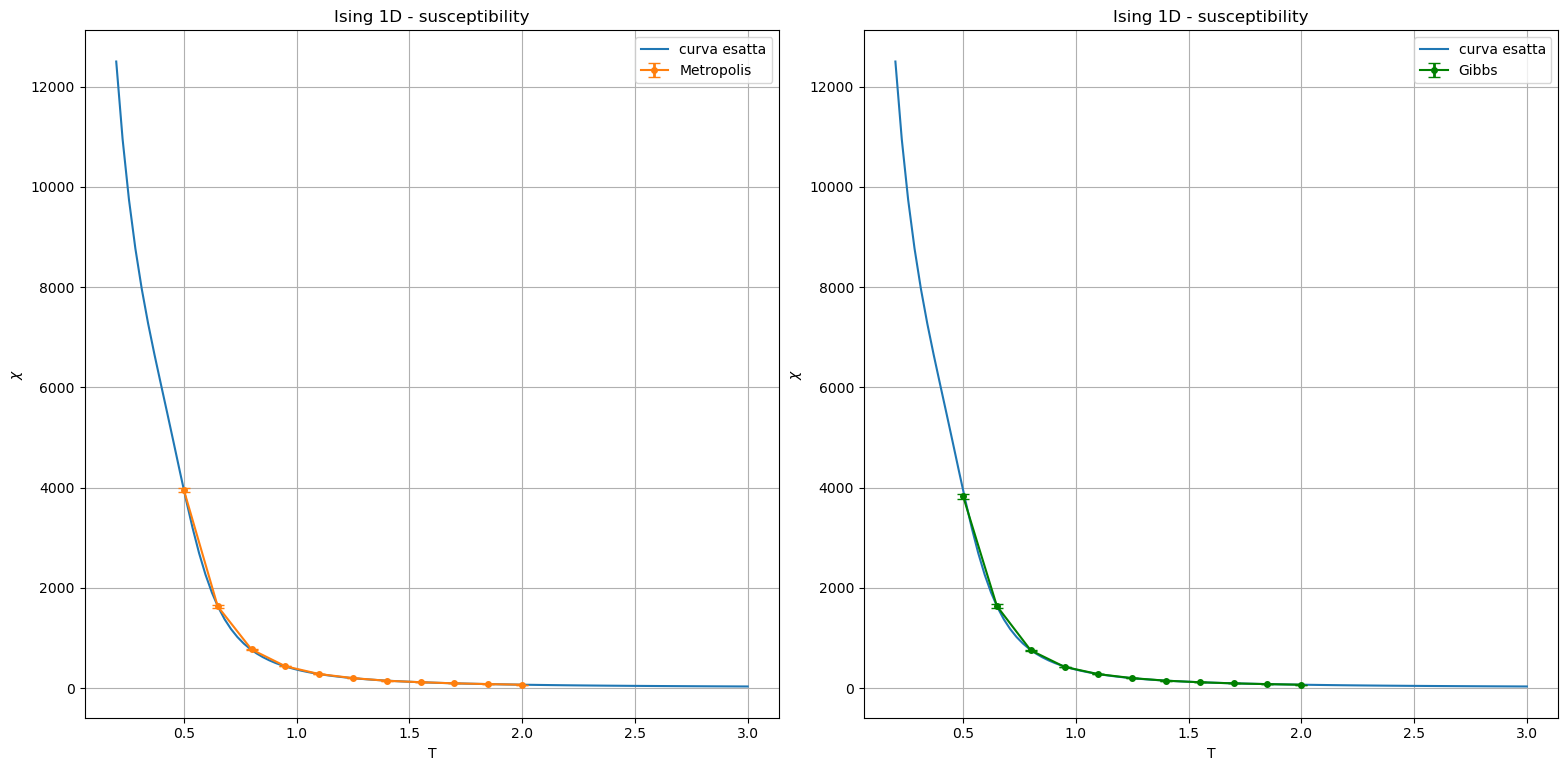

In [15]:
X = Ns*beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

chi_M, err_M, chi_G, err_G = np.loadtxt("susceptibility.dat", usecols=(1,2,3,4), delimiter=' ', unpack='true')

fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.tight_layout(pad=3.0)

axes[0].plot(T,X,label='curva esatta')
axes[0].errorbar(temp,chi_M,yerr=err_M,fmt='-o',markersize=4,elinewidth=2,capsize=4,label='Metropolis')
axes[0].set_xlabel('T')
axes[0].set_ylabel(r'$\chi$')
axes[0].set_title('Ising 1D - susceptibility')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(T,X,label='curva esatta')
axes[1].errorbar(temp,chi_G,yerr=err_G,fmt='-go',markersize=4,elinewidth=2,capsize=4,label='Gibbs')
axes[1].set_xlabel('T')
axes[1].set_ylabel(r'$\chi$')
axes[1].set_title('Ising 1D - susceptibility')
axes[1].legend()
axes[1].grid(True)

Per entrambi i metodi di campionamento, i dati risultano ben sovrapposti alle curve teoriche. I due algoritmi sono quindi del tutto equivalenti.

Possiamo infine analizzare l'andamento dell'accettazione dell'algoritmo di Metropolis in funzione della temperatura $T$.

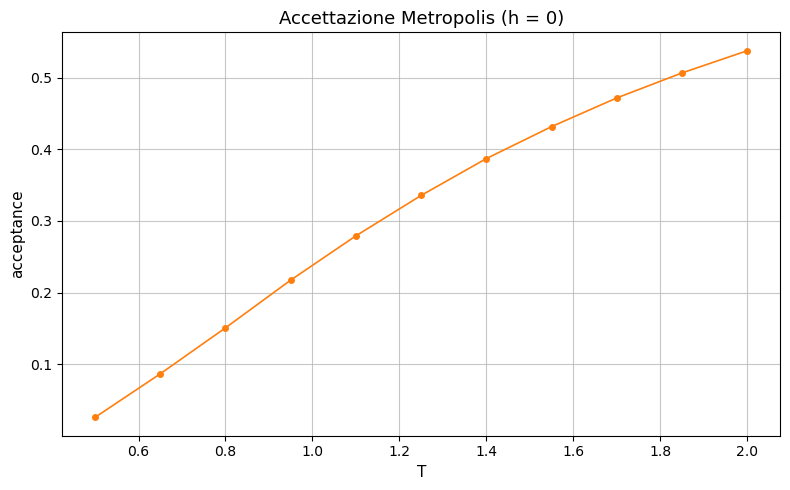

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

T, acc = np.loadtxt("acceptance.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(8, 5))

plt.plot(T, acc, linestyle='-', marker='o', color='tab:orange', linewidth=1.2, markersize=4)
plt.xlabel('T', fontsize=11)
plt.ylabel('acceptance', fontsize=11)
plt.title("Accettazione Metropolis (h = 0)", fontsize=13)
plt.grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

Dal grafico notiamo che l'accettazione cresce all'aumentare della temperatura. Questo andamento è legato al fatto che, mentre a bassa temperatura il sistema rimane congelato attorno allo stato con energia minima, ad alta temperatura invece esso può esplorare molte configurazioni diverse.